In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl
from scipy.optimize import curve_fit

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,13)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

# runstr='Dry'
# dfd=pd.read_pickle('../dfs/df_run_02_dry_delta.pkl')
# df=pd.read_pickle('../dfs/df_run_02_dry.pkl')

runstr='Wet'
dfd=pd.read_pickle('../dfs/df_run_02_land_delta.pkl')
df=pd.read_pickle('../dfs/df_run_02_land.pkl')

f=2*np.sin(30*(np.pi/180))*7.2921150E-5 #coriolis number
fs=8 #font size
dfd['tal']=round((dfd.t-dfd.tlf)*24,2)

dfd['rV10max']=round(dfd['rV10max'],3)

df['tal']=round((df.t-df.tlf)*24,2)

In [71]:
# fig,axs=plt.subplots(4,4,sharex=False,dpi=200,figsize=(10,10))
# plt.subplots_adjust(hspace=0.6,wspace=0.6)
# for i in range(13,len(axs.flat)):
#     axs.flat[i].axis('off')
    # plt.subplots_adjust(hspace=0.6,wspace=0.6)

# thP=[];thV=[];k_VrPhat=[];vrRmax1=[]
# Rmax0=[];Pmin0=[];Vmax0=[];Ros0=[]
# Rmax1=[];Pmin1=[];Vmax1=[];Ros1=[]

Pe=1016
tmin=1.5
tmax=10.5

# k=2
row0=0
tlfs=dfd.tlf.unique()
# tlfs=np.delete(tlfs,11)
rsqs=[];rs=[];vrs=[]
print('Getting vars')
for n,tlf in enumerate(tlfs):
       
#     df1=dfd.query('tlf==@tlf & tal==1.5')

#     ax=axs.flat[n]
    df1=dfd.query('tlf==@tlf & tal >= @tmin & tal <= @tmax')
    

    Rmax=df1.iloc[row0].rV10max
    rsq=[]
    for ix,row in df1[row0:].iterrows():
        r=row.r
        vr=row.vrcol
        rx=np.argmin(np.abs(r-Rmax))
        r=r[:rx]
        vr=vr[:rx]
        rsq.append(np.corrcoef(r,vr)[0,1])
    rsqs.append(rsq)
    
#         ax.plot(row.r,row.vrcol)
        
#     ax.set_xlim(0,Rmax)
#     ylim=ax.get_ylim()
#     ax.set_ylim(0,ylim[1])
#     ax.grid(True)
#     ax.set_ylabel('V$_r$ (m s$^{-1}$)')
#     ax.set_xlabel('R (km)')
#     ax.set_title('$t_{LF}$='+str(round(tlf)))
    
    ax=axs1
    r=df1.iloc[row0].r
    vr=df1.iloc[row0].vrcol
    rx=np.argmin(np.abs(r-Rmax))
    r=r[:rx]
    vr=vr[:rx]
    rs.append(r)
    vrs.append(vr)
#     print(Rmax*1000)

Getting vars


Text(0.5, 0, 'Time (h)')

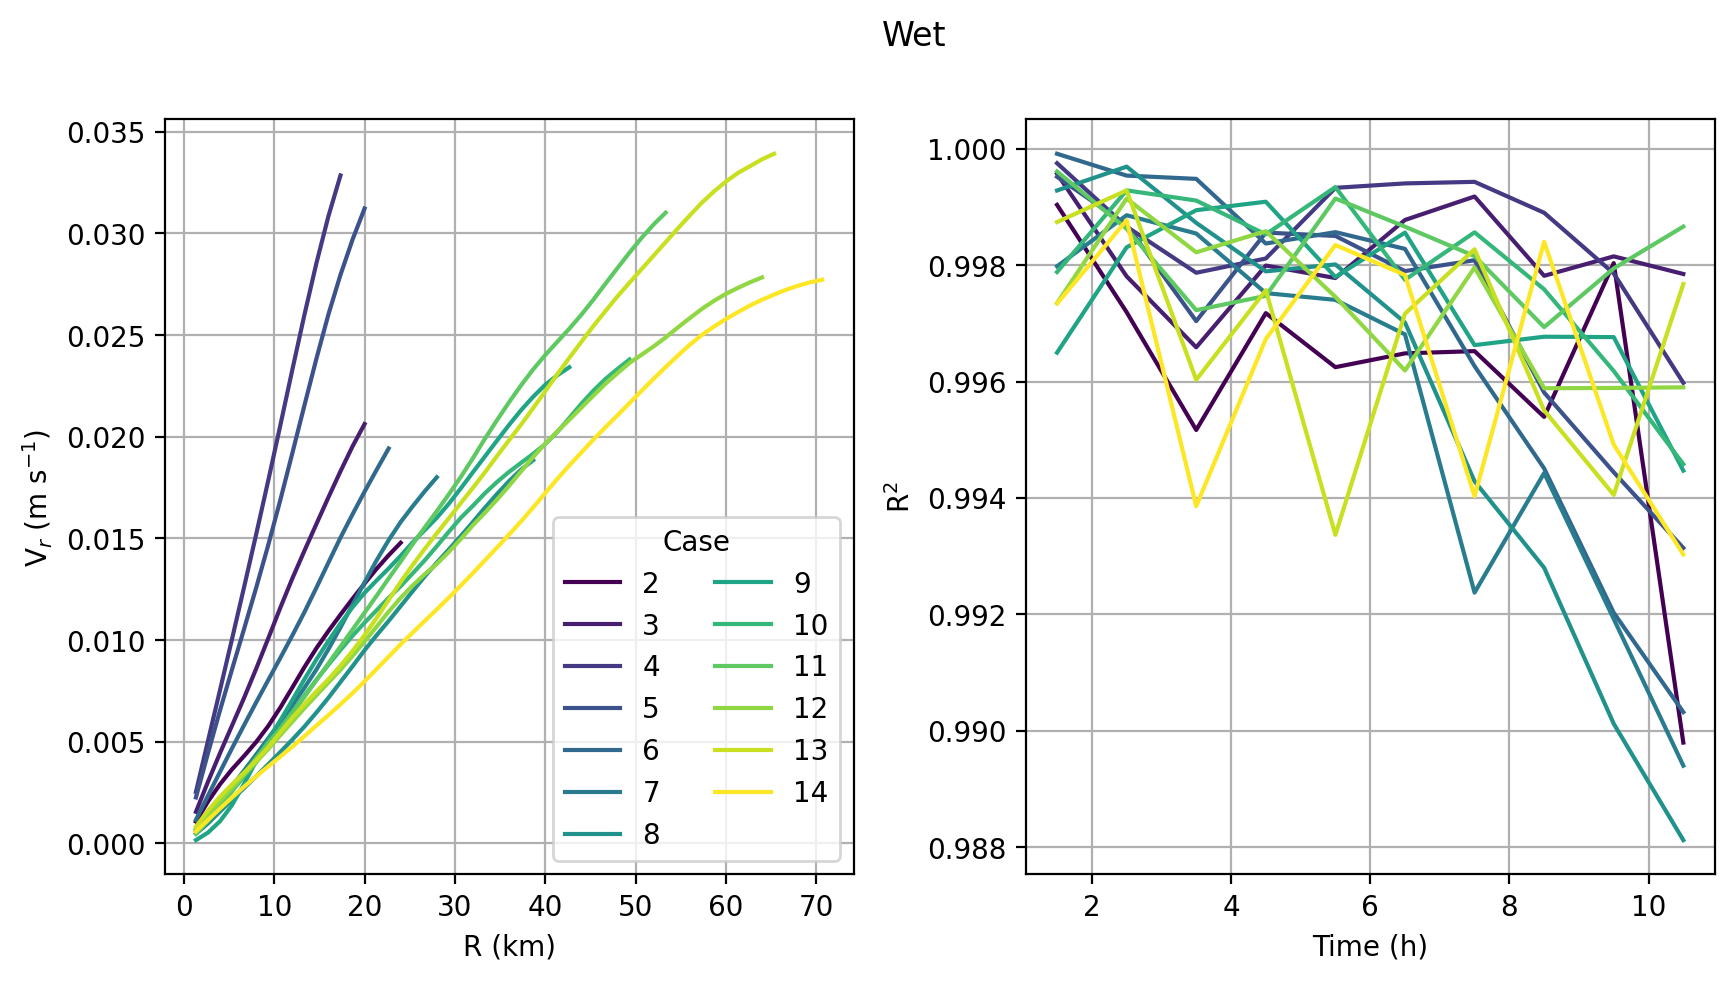

In [72]:
fig,axs=plt.subplots(1,2,sharex=False,dpi=200,figsize=(10,5))
plt.subplots_adjust(wspace=0.25)
fig.suptitle(runstr)

ax=axs.flat[0]
for r,vr in zip(rs,vrs):
    ax.plot(r,vr)
ax.grid(True)
ax.set_ylabel('V$_r$ (m s$^{-1}$)')
ax.set_xlabel('R (km)') 
tals=np.arange(tmin,tmax+1,1)
ax.legend(tals,ncol=2,
          title='Time since landfall (h)',
          loc='upper left',
          bbox_to_anchor=(1.1, 1.1))

tlfsstr=[str(round(tlf)) for tlf in tlfs]
ax.legend((tlfsstr),ncol=2,
          title='Case')


ax=axs.flat[1]
for rsq in rsqs:
    ax.plot(tals,rsq)
ax.grid(True)
ax.set_ylabel('R$^2$')
ax.set_xlabel('Time (h)') 